In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\HEALTH PROJECT\Health_Insurance_Claims_Dataset.csv")

In [4]:
df.head()

,Age,Body_Mass_Index,Gender,Income,Pre_Existing_Conditions,Smoking_Status,Marital_Status,Education_Level,Household_Size,Employment_Status,Claims
0,56,27.2,Male,103596,Asthma,Yes,Married,Masters,5,Employed,13327.81
1,69,38.1,Male,86732,NaN,No,Married,High School,4,Employed,14244.21
2,46,26.0,Male,163369,NaN,No,Divorced,High School,4,Unemployed,13234.88
3,32,30.8,Male,88323,Diabetes,No,Married,Masters,6,Self-Employed,9860.48
4,60,31.9,Female,43816,Asthma,Yes,Divorced,High School,4,Unemployed,12949.64


In [5]:
df

,Age,Body_Mass_Index,Gender,Income,Pre_Existing_Conditions,Smoking_Status,Marital_Status,Education_Level,Household_Size,Employment_Status,Claims
0,56,27.2,Male,103596,Asthma,Yes,Married,Masters,5,Employed,13327.81
1,69,38.1,Male,86732,NaN,No,Married,High School,4,Employed,14244.21
2,46,26.0,Male,163369,NaN,No,Divorced,High School,4,Unemployed,13234.88
3,32,30.8,Male,88323,Diabetes,No,Married,Masters,6,Self-Employed,9860.48
4,60,31.9,Female,43816,Asthma,Yes,Divorced,High School,4,Unemployed,12949.64
...,...,...,...,...,...,...,...,...,...,...,...
1325,68,32.3,Female,190091,Asthma,Yes,Single,Bachelors,4,Employed,16250.31
1326,41,31.7,Male,24006,Asthma,Yes,Married,High School,2,Employed,11142.64
1327,42,25.8,Male,185465,Asthma,No,Married,PhD,5,Unemployed,13746.05
1328,24,36.5,Male,30956,Hypertension,No,Single,High School,1,Employed,7962.32


In [6]:
# Summary statistics
print(df.describe())

               Age  Body_Mass_Index         Income  Household_Size  \
count  1330.000000      1330.000000    1330.000000     1330.000000   
mean     43.759398        29.019925  110411.590977        3.393233   
std      15.056628         6.402645   53062.812396        1.743814   
min      18.000000        18.100000   20174.000000        1.000000   
25%      31.000000        23.300000   63950.250000        2.000000   
50%      44.000000        29.200000  110161.000000        3.000000   
75%      56.000000        34.575000  156267.000000        5.000000   
max      69.000000        40.000000  199992.000000        6.000000   

             Claims  
count   1330.000000  
mean   12450.939759  
std     2412.788418  
min     5704.240000  
25%    10668.435000  
50%    12495.090000  
75%    14219.610000  
max    19254.350000  


In [8]:
# Check for missing values
print(df.isnull().sum())

Age                          0
Body_Mass_Index              0
Gender                       0
Income                       0
Pre_Existing_Conditions    306
Smoking_Status               0
Marital_Status               0
Education_Level              0
Household_Size               0
Employment_Status            0
Claims                       0
dtype: int64


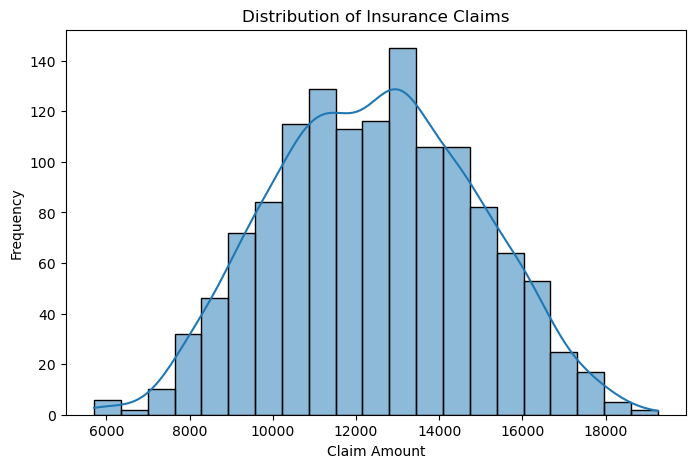

In [9]:
# Visualize distribution of 'Claims'
plt.figure(figsize=(8,5))
sns.histplot(df['Claims'], kde=True)
plt.title('Distribution of Insurance Claims')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

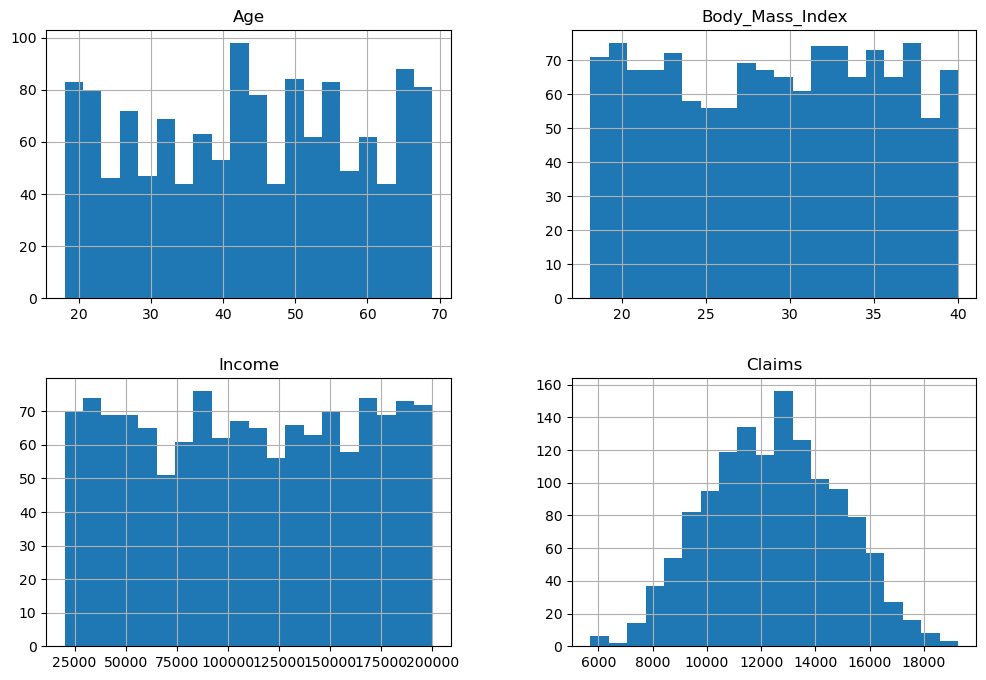

In [67]:
# Histogram for numerical variables
df[['Age', 'Body_Mass_Index', 'Income', 'Claims']].hist(bins=20, figsize=(12,8))
plt.show()


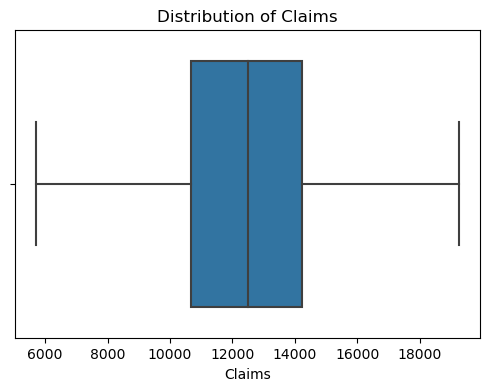

In [71]:
# Boxplot to check outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Claims'])
plt.title('Distribution of Claims')
plt.show()


In [72]:
# View the columns
print(df.columns.tolist())


['Age', 'Body_Mass_Index', 'Gender', 'Income', 'Pre_Existing_Conditions', 'Smoking_Status', 'Marital_Status', 'Education_Level', 'Household_Size', 'Employment_Status', 'Claims']


In [99]:
# Clean column names (remove spaces if any)
df.columns = df.columns.str.strip()

In [86]:
# Correct Categorical Columns
categorical_cols = ['Gender', 'Pre_Existing_Conditions', 'Smoking_Status', 
                    'Marital_Status', 'Education_Level', 'Household_Size', 'Employment_Status']


In [92]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [93]:
print(df_encoded.columns.tolist())


['Age', 'Body_Mass_Index', 'Income', 'Claims', 'Gender_Male', 'Pre_Existing_Conditions_Diabetes', 'Pre_Existing_Conditions_Hypertension', 'Smoking_Status_Yes', 'Marital_Status_Married', 'Marital_Status_Single', 'Education_Level_High School', 'Education_Level_Masters', 'Education_Level_PhD', 'Household_Size_2', 'Household_Size_3', 'Household_Size_4', 'Household_Size_5', 'Household_Size_6', 'Employment_Status_Self-Employed', 'Employment_Status_Student', 'Employment_Status_Unemployed']


In [94]:
# Check the output
print(df_encoded.head())

   Age  Body_Mass_Index  Income    Claims  Gender_Male  \
0   56             27.2  103596  13327.81         True   
1   69             38.1   86732  14244.21         True   
2   46             26.0  163369  13234.88         True   
3   32             30.8   88323   9860.48         True   
4   60             31.9   43816  12949.64        False   

   Pre_Existing_Conditions_Diabetes  Pre_Existing_Conditions_Hypertension  \
0                             False                                 False   
1                             False                                 False   
2                             False                                 False   
3                              True                                 False   
4                             False                                 False   

   Smoking_Status_Yes  Marital_Status_Married  Marital_Status_Single  ...  \
0                True                    True                  False  ...   
1               False             

In [98]:
numeric_cols = ['Age', 'Body_Mass_Index', 'Income']


In [100]:
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])



In [101]:
X = df_encoded.drop('Claims', axis=1)
y = df_encoded['Claims']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [106]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [107]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 1015941.9226647988
R-squared (R²): 0.8432634273509636


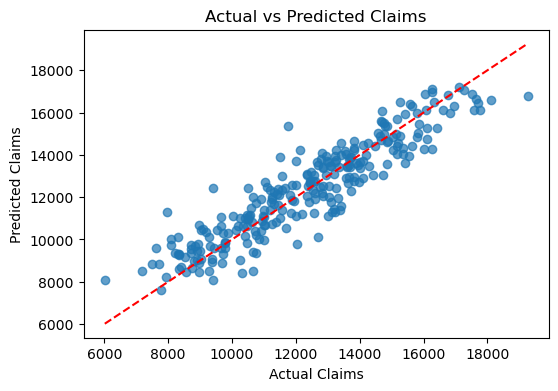

In [109]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Claims')
plt.ylabel('Predicted Claims')
plt.title('Actual vs Predicted Claims')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect prediction
plt.show()


In [110]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


                                 Feature  Coefficient
0                                    Age  1843.437968
2                                 Income  1086.194261
6                     Smoking_Status_Yes   379.730971
18             Employment_Status_Student   115.299149
10               Education_Level_Masters   100.901629
5   Pre_Existing_Conditions_Hypertension    69.791910
4       Pre_Existing_Conditions_Diabetes    69.142737
9            Education_Level_High School    48.803097
19          Employment_Status_Unemployed    36.355467
8                  Marital_Status_Single    31.765579
1                        Body_Mass_Index   -31.927310
11                   Education_Level_PhD   -40.909081
7                 Marital_Status_Married   -43.005411
12                      Household_Size_2   -72.921219
17       Employment_Status_Self-Employed   -83.168670
3                            Gender_Male  -121.312582
13                      Household_Size_3  -250.075623
15                      Hous

In [112]:
df_encoded.to_csv('Health_Insurance_Cleaned.csv', index=False)
